# Google Stock Price Prediction:

**Recurrent neural networks (RNN)** have proved one of the most powerful models for processing sequential data. *Long Short-Term memory* is one of the most successful RNNs architectures. **LSTM** introduces the memory cell, a unit of computation that replaces traditional artificial neurons in the hidden layer of the network. With these memory cells, networks are able to effectively associate memories and input remote in time, hence suit to grasp the structure of data dynamically over time with high prediction capacity.<br/>

There are 7 columns in each dataset:-
- Date 
- open
- high
- low
- close
- volume

In [1]:
# Recurrent Neural Network
# Data Preprocessing

# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the training set
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [4]:
df_train.shape

(1258, 6)

In [5]:
training_set = df_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set = sc.fit_transform(training_set)

In [7]:
training_set

array([[-1.37285476],
       [-1.33320882],
       [-1.34269224],
       ...,
       [ 1.71221829],
       [ 1.64392454],
       [ 1.64010483]])

In [8]:
training_set.shape

(1258, 1)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
# Making a new dataset

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Recurrent Neural Network on LSTM Model:

In [11]:
# Import the Keras libraries 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\Manish Garg\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
# Initialising the RNN
model = Sequential([
    
    # first LSTM layer and some Dropout regularisation
    LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    Dropout(0.2),
    
    # second LSTM layer and some Dropout regularisation
    LSTM(units = 50, return_sequences = True),
    Dropout(0.2),
    
    # third LSTM layer and some Dropout regularisation
    LSTM(units = 50, return_sequences = True),
    Dropout(0.2),
    
    # fourth LSTM layer and some Dropout regularisation
    LSTM(units = 50),
    Dropout(0.2),
    
    # output layer
    Dense(units = 1),
])


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [14]:
# Training the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.1797
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0391
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0327
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0339
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0285
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0296
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0275
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0290
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0253
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0275
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0283
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0115
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0114
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0111
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0129


### Making the predictions

In [16]:
# The real stock price of 2017
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [17]:
real_stock_price = df_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [18]:
real_stock_price.shape

(20, 1)

In [19]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)


In [20]:
# apply features scaling
inputs = sc.transform(inputs)

In [21]:
# Again creating a data structure with 60 timesteps and 1 output
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [22]:
pred_stock_price = model.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)
pred_stock_price

array([[773.2583 ],
       [771.7407 ],
       [777.695  ],
       [776.4845 ],
       [781.0153 ],
       [788.816  ],
       [789.07526],
       [786.3918 ],
       [788.87024],
       [790.54553],
       [790.4495 ],
       [789.7786 ],
       [789.73413],
       [791.3003 ],
       [791.6295 ],
       [801.2358 ],
       [805.4494 ],
       [808.9864 ],
       [806.58417],
       [794.5123 ]], dtype=float32)

### Visualisation:

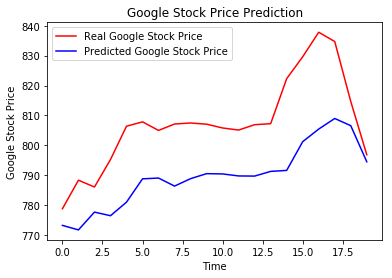

In [23]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Great!!😍